# FEATURES SELECTION FOR INVESTMENT DECISION

This analysis is based upon the "nba_dataset.csv". Link below. 

https://github.com/MEMAUDATA/memaudata.github.io/blob/main/datasets/nba_dataset.csv

Two questions here : 

1) Identify the best features for investment decision and develop a ML model
2) Create a web app with the previous model. This app will run locally.

Objective : Enhance recall score !

Dataframe shape : 

- 1340 rows and 21 columns
- Target : "TARGET_5Yrs"
- Name of players : column "Name"
- Features : 19 columns

The question on investment decision is based upon the column "Target_5YRS" which is, here, our dependant variable (supervided ML).
Target_5YRS = 0 => No investment
Target_5YRS = 1 => investment

- Name         : 1 -> type object 
- GP           : 1 -> type int
- Others       : 19 -> type float64
- Nan          : Only 3P% -> 0.008209 %
- Duplicates   : 46 players
- Outliers     : 5% max in some columns not all. Keep all points for now.

Dataframe in depth:

- target column ("TARGET_5Yrs") : 62 % positives / 37% negatives 
- Quantitatives columns : Not normalized and not normally distributed
- GP column : From 10 to 80 , not normally distributed.

Hypothesis : 

-  Target / GP : test difference !
-  Target /  Quantitatives variables : Test differences (Mann-Whitney) on 
   -  MIN / PTS / FGM / FGA/FG% /FTM/ 3P Made / FT% / AST /STL and TOV. Only 3P Made is not significant. All the others may present an impact on the target and therefore might be consider for modelling.

NV, Toulouse, octobre,2024

### Install all required librairies from requirements.txt

In [3]:
#!pip install -r requirements.txt 

### Import librairies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import wilcoxon
import nbconvert

# Exploratory Data Analysis

In [5]:
# Load dataset
df1 = pd.read_csv("../datasets/nba_dataset.csv")

Copy the dataset to avoid reloading it

In [6]:
# backup 
df = df1.copy()
df.shape

(1340, 21)

In [7]:
# Display all columns
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
df.head()


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [8]:
df.dtypes.value_counts()


float64    19
object      1
int64       1
Name: count, dtype: int64

### Plot the entire data with heatmap from seaborn to detect NaN

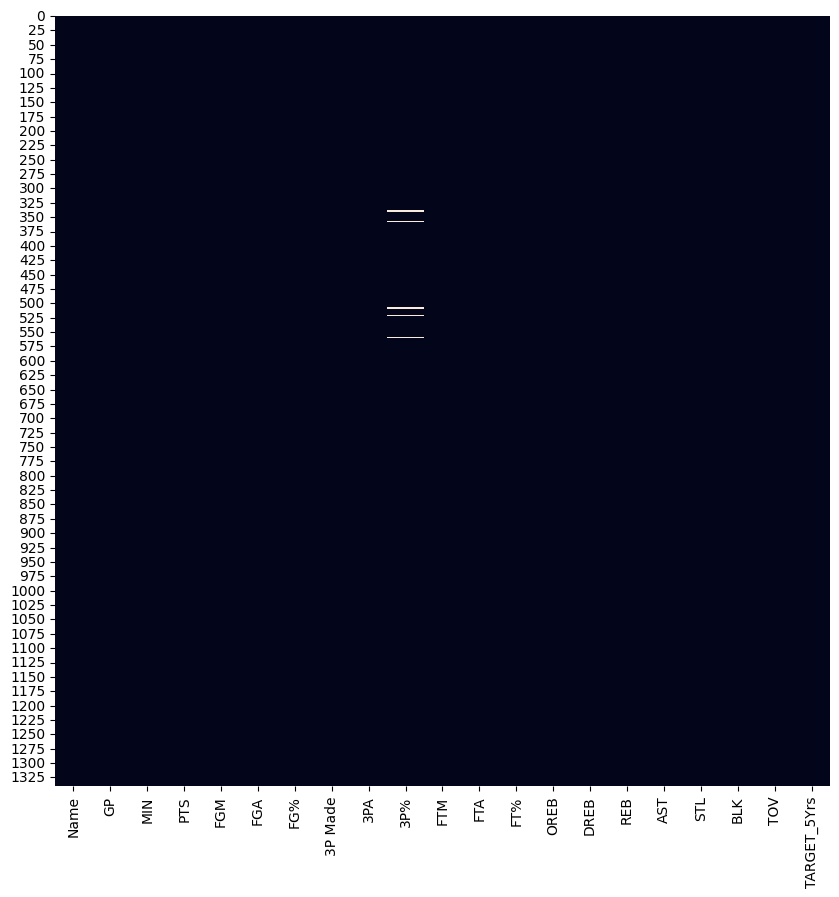

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(),cbar=False) # 1 = empty
plt.show()

# Nan

In [10]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Name           0.000000
BLK            0.000000
STL            0.000000
AST            0.000000
REB            0.000000
DREB           0.000000
OREB           0.000000
FT%            0.000000
FTA            0.000000
TOV            0.000000
FTM            0.000000
3PA            0.000000
3P Made        0.000000
FG%            0.000000
FGA            0.000000
FGM            0.000000
PTS            0.000000
MIN            0.000000
GP             0.000000
TARGET_5Yrs    0.000000
3P%            0.008209
dtype: float64

This dataset contains less than 0.008% of Nan within a single column (3P%)

# Duplicated players ?

In [11]:
df_without_duplicates = df.drop_duplicates(subset='Name')
print(f"Nb of duplicated players : {df.shape[0] - df_without_duplicates.shape[0]}")

Nb of duplicated players : 46


# Target column

In [12]:
df['TARGET_5Yrs'].value_counts(normalize=True)

TARGET_5Yrs
1.0    0.620149
0.0    0.379851
Name: proportion, dtype: float64

# Quantitatives columns

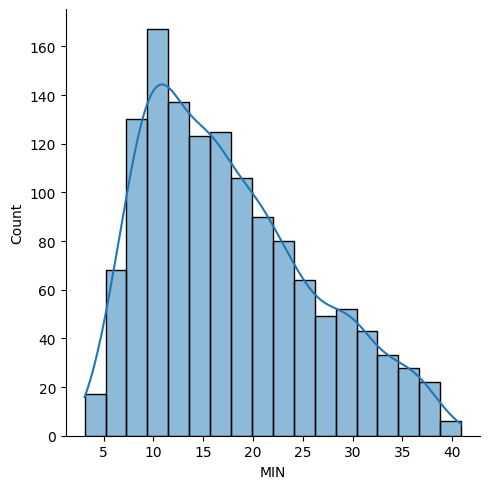

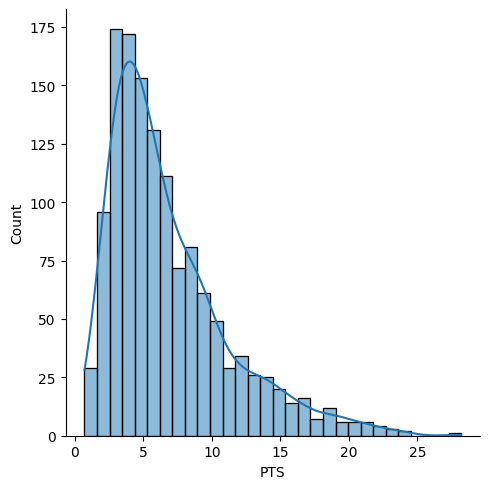

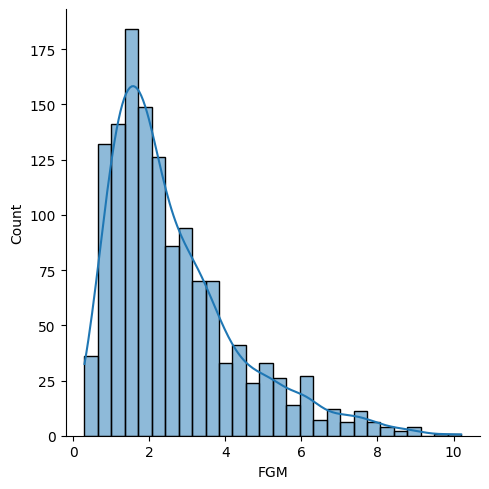

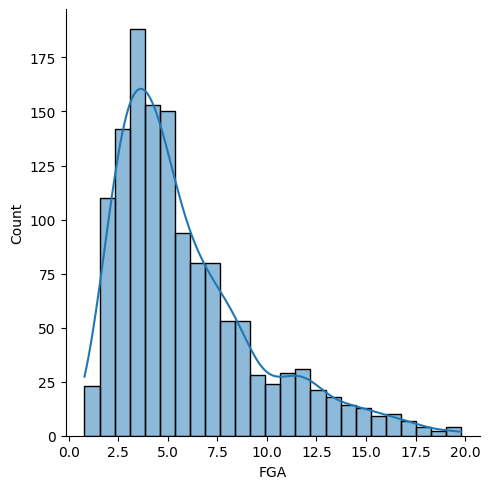

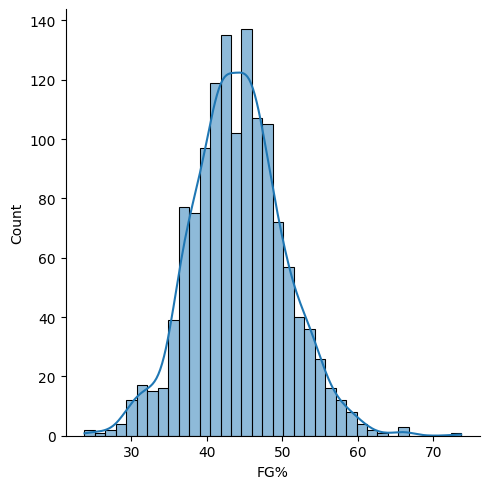

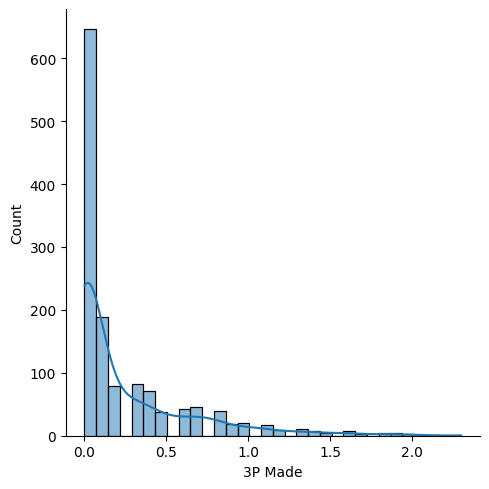

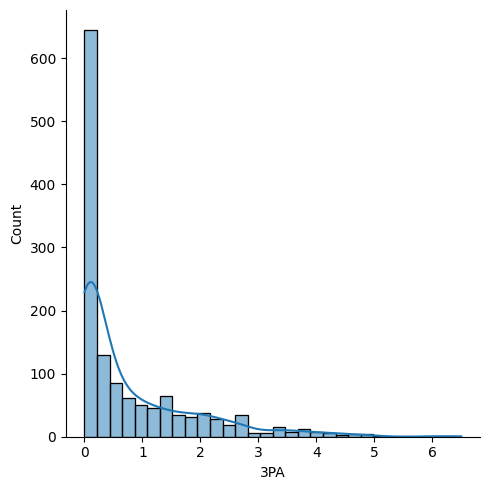

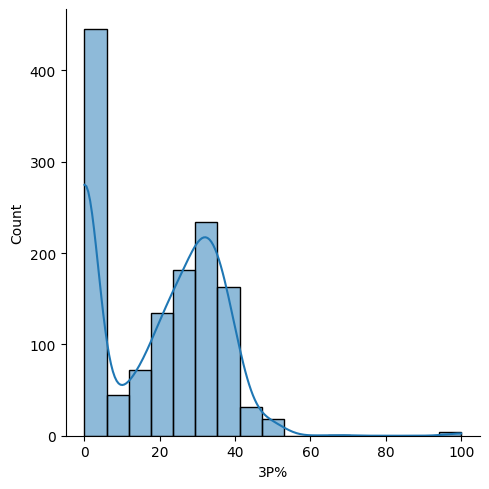

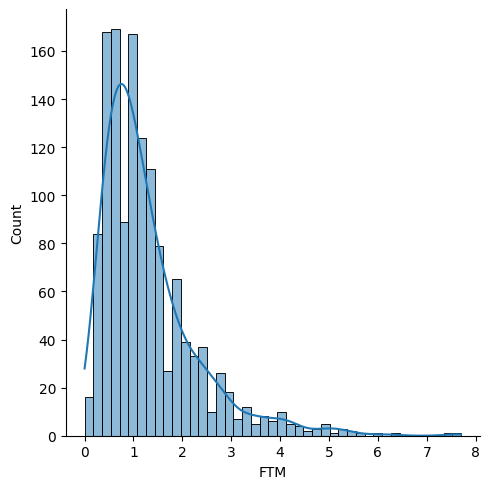

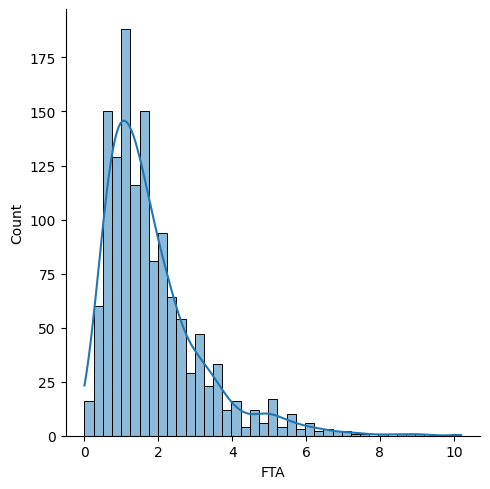

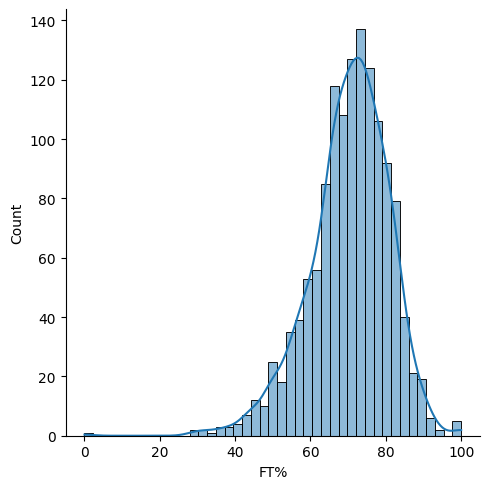

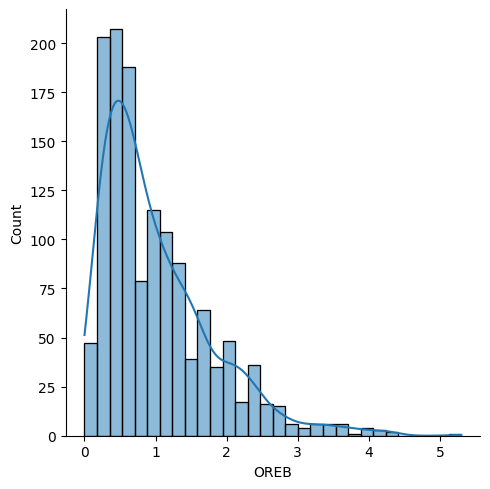

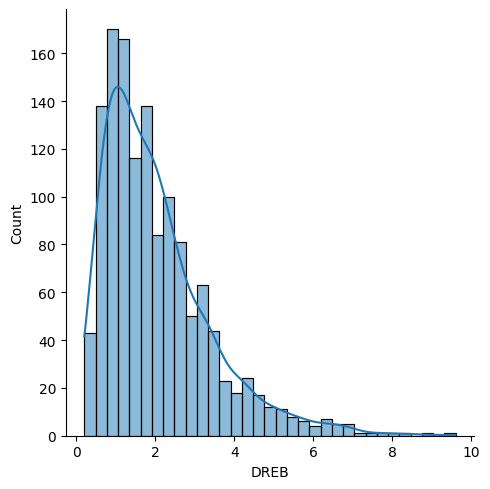

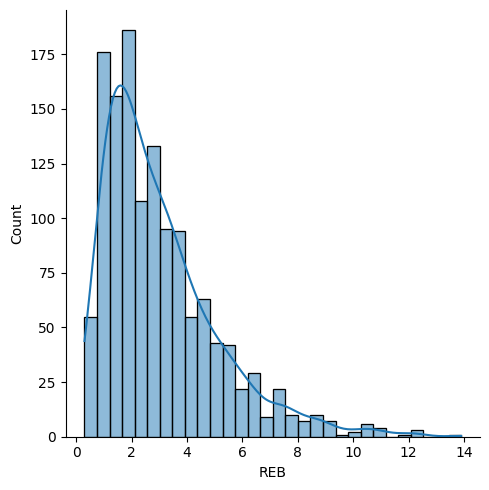

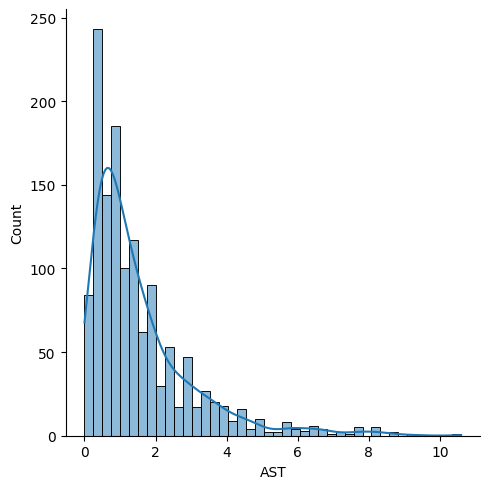

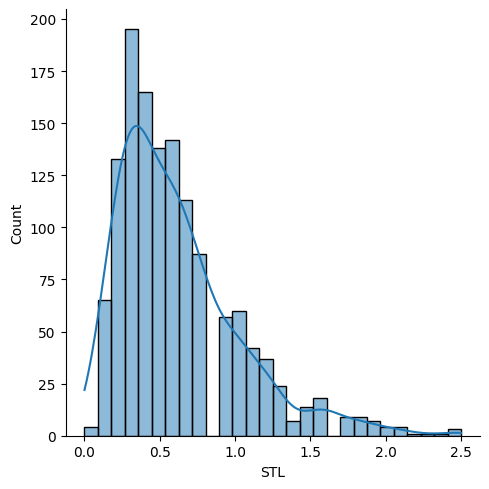

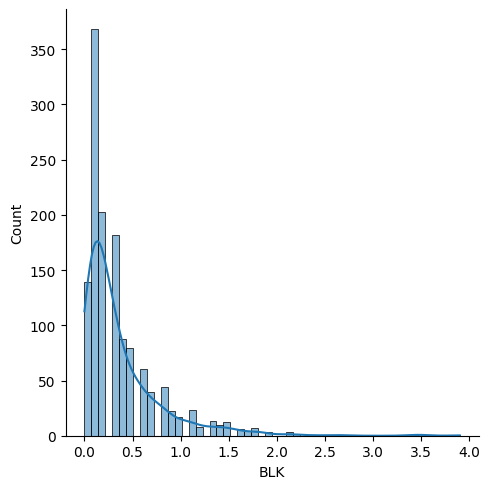

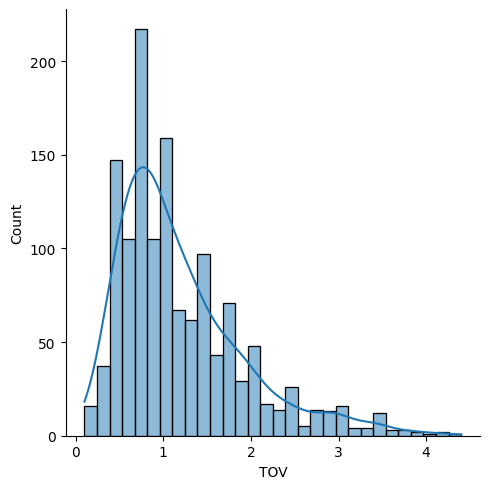

In [13]:
for col in df.select_dtypes('float'):
    if col != 'TARGET_5Yrs':
        plt.Figure(figsize=(4,4))
        sns.displot(df[col], kde = 'True')

# GP column : int type

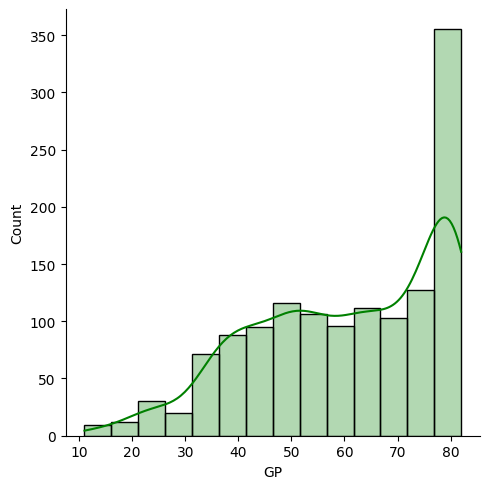

In [14]:
sns.displot(df['GP'],kde=True,color='green',alpha=0.3)

# Outliers ?

In [98]:
# Remove columns for counting outliers
df_outliers = df.drop(['Name', 'TARGET_5Yrs'], axis='columns')
print(df_outliers.head())

   GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   0.7   
1  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  2.6  3.4  76.5   0.5   
2  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  0.9  1.3  67.0   0.5   
3  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   1.0   
4  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   1.0   

   DREB  REB  AST  STL  BLK  TOV  
0   3.4  4.1  1.9  0.4  0.4  1.3  
1   2.0  2.4  3.7  1.1  0.5  1.6  
2   1.7  2.2  1.0  0.5  0.3  1.0  
3   0.9  1.9  0.8  0.6  0.1  1.0  
4   1.5  2.5  0.3  0.3  0.4  0.8  


<Figure size 640x480 with 0 Axes>

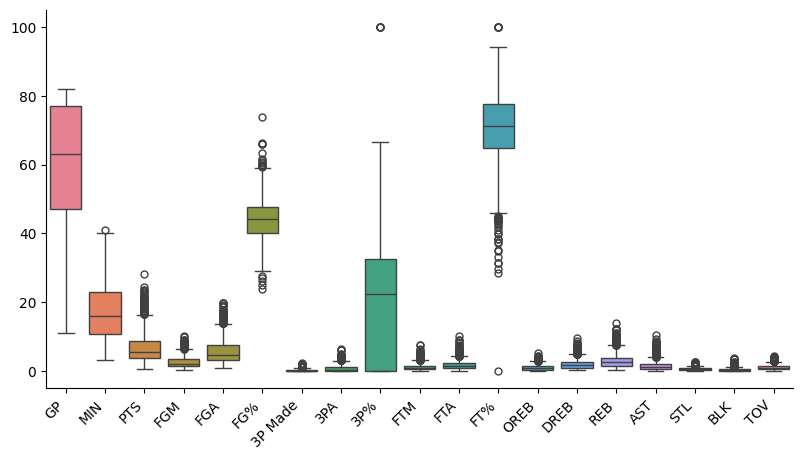

In [104]:
# Group visualization
plt.figure()
g = sns.catplot(data=df_outliers ,kind="box",height = 10)
g.fig.set_size_inches(8, 4) 
plt.xticks(rotation=45, ha='right')
plt.show()

In [105]:
outlier_counts = {}
for col in df_outliers.columns:
    q1 = df_outliers[col].quantile(0.25)
    q3 = df_outliers[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_outliers[(df_outliers[col] < lower_bound) | (df_outliers[col] > upper_bound)]
    outlier_counts[col] = (len(outliers)/df_outliers.shape[0])*100

for col, count in outlier_counts.items():
    print(f"{col :_<10}  {count :.2f} % of outliers")

GP________  0.00 % of outliers
MIN_______  0.08 % of outliers
PTS_______  4.33 % of outliers
FGM_______  3.86 % of outliers
FGA_______  4.64 % of outliers
FG%_______  1.47 % of outliers
3P Made___  5.41 % of outliers
3PA_______  5.18 % of outliers
3P%_______  0.31 % of outliers
FTM_______  5.33 % of outliers
FTA_______  5.49 % of outliers
FT%_______  2.70 % of outliers
OREB______  2.94 % of outliers
DREB______  4.02 % of outliers
REB_______  3.94 % of outliers
AST_______  6.26 % of outliers
STL_______  4.33 % of outliers
BLK_______  5.56 % of outliers
TOV_______  5.02 % of outliers


For now keep all data into the dataset.

# Realtionship between GP and target

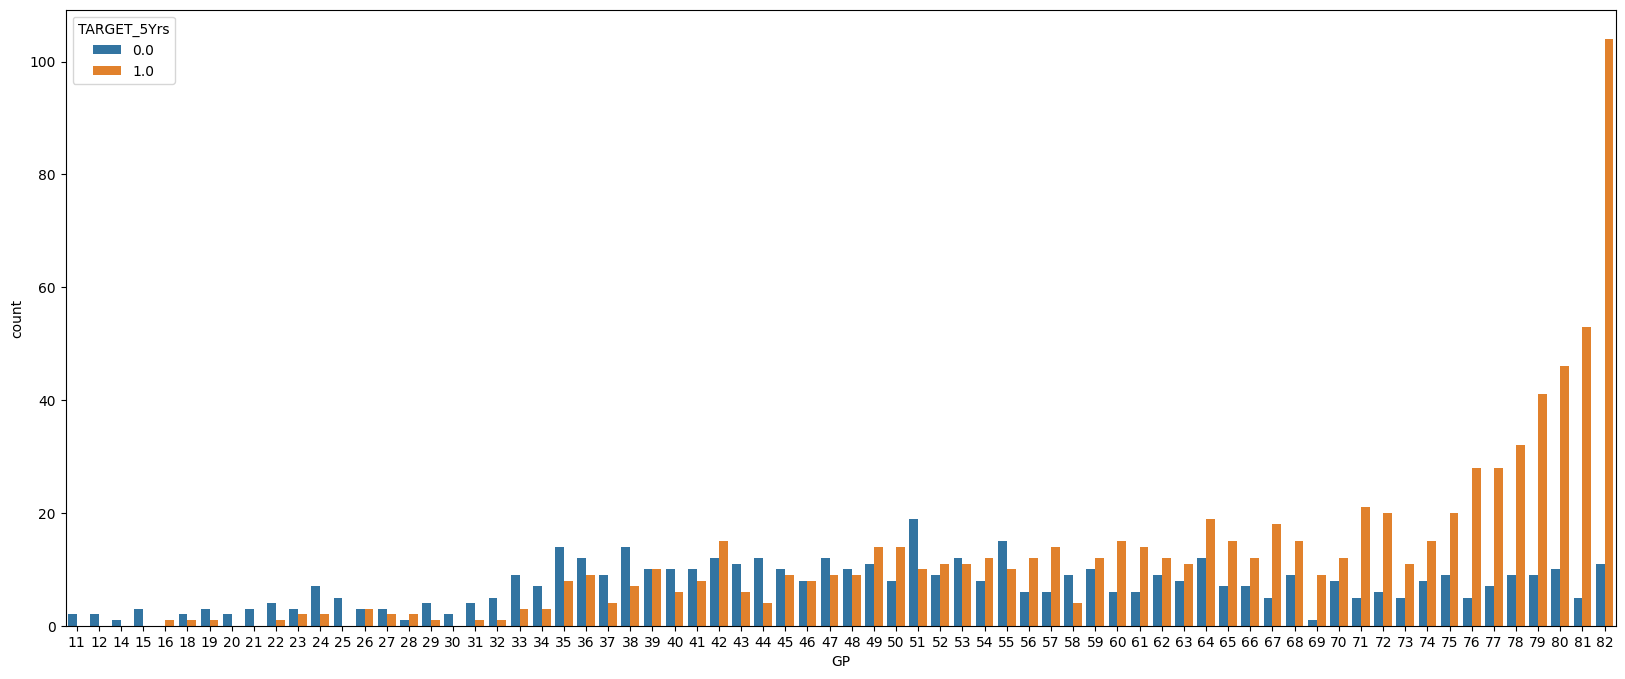

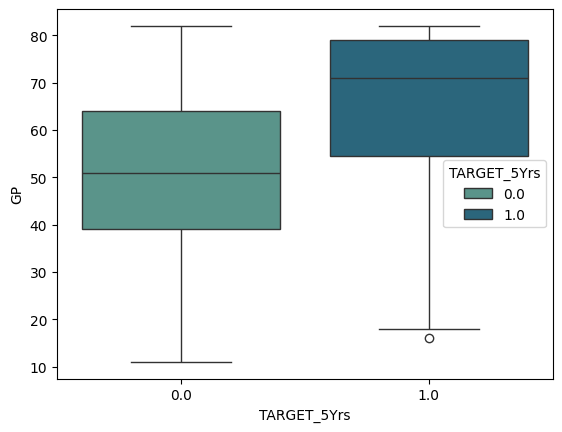

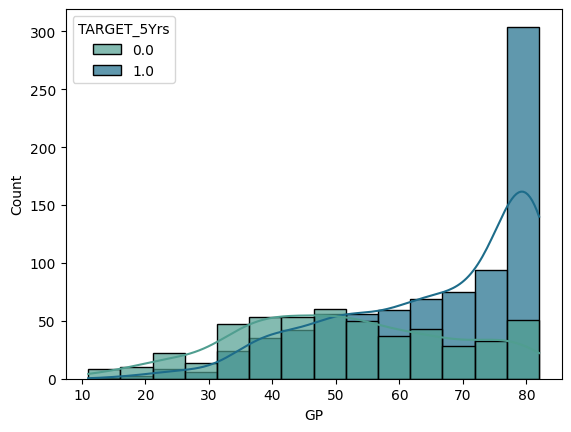

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(x='GP',hue='TARGET_5Yrs',data=df)
plt.show()

plt.figure()
sns.boxplot(x='TARGET_5Yrs', y='GP', data=df,hue='TARGET_5Yrs',palette="crest")
plt.show()

plt.figure()
sns.histplot(data=df, x=df['GP'], hue='TARGET_5Yrs', kde=True, palette="crest", alpha=0.7, common_norm=False)
plt.show()

# Relationship between target and variables

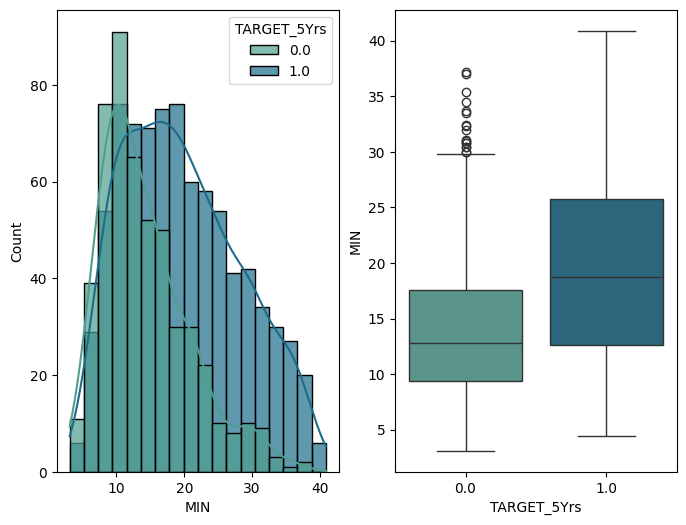

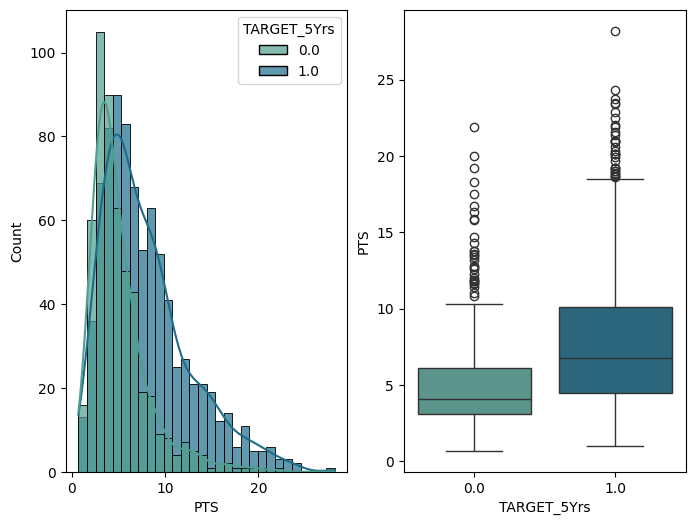

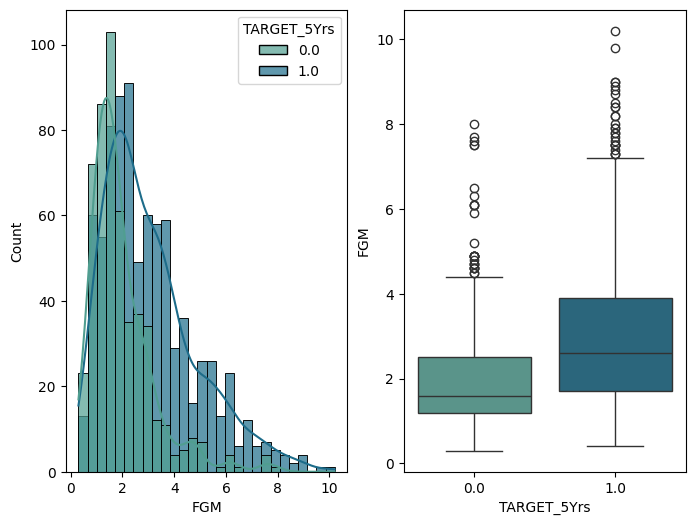

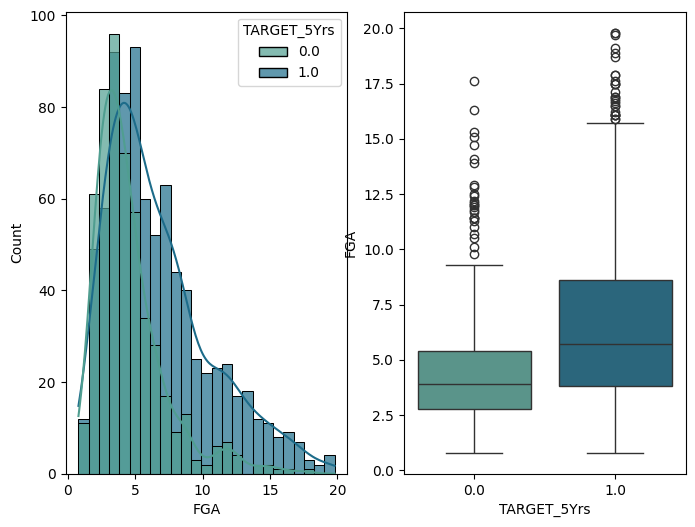

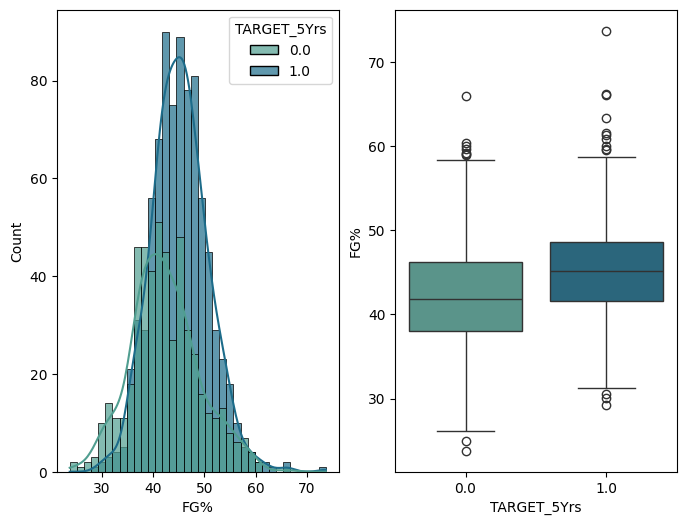

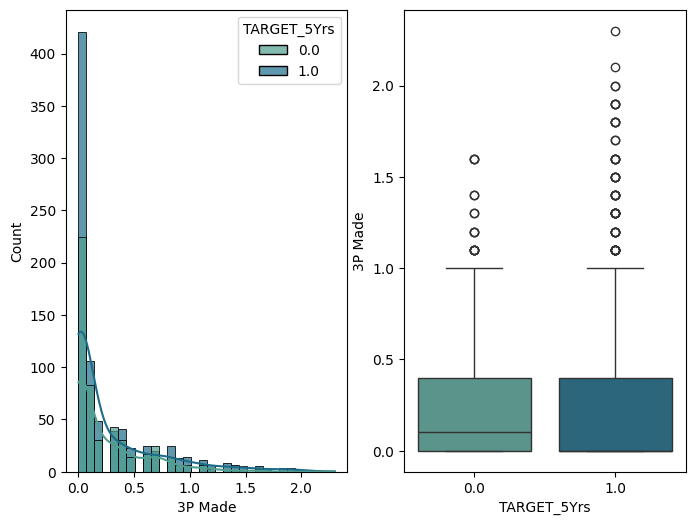

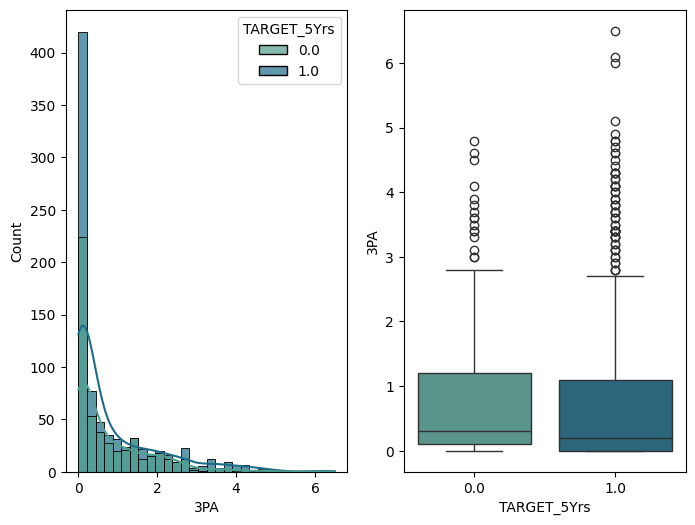

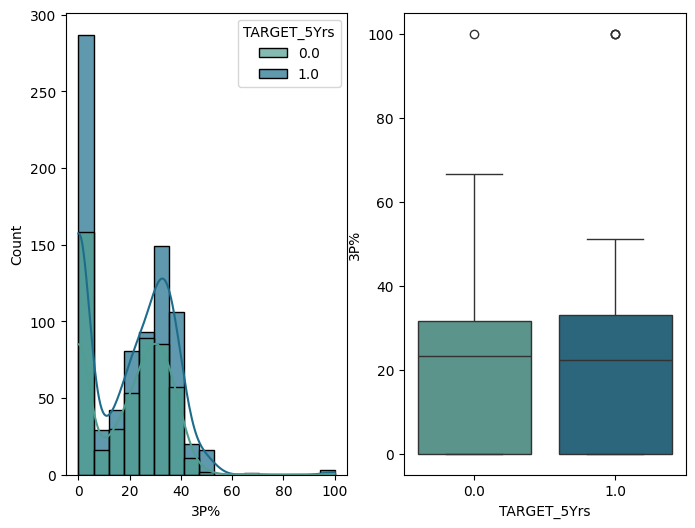

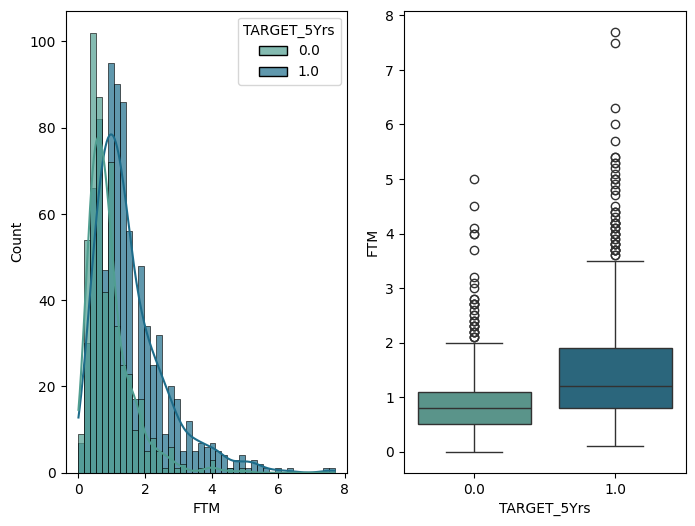

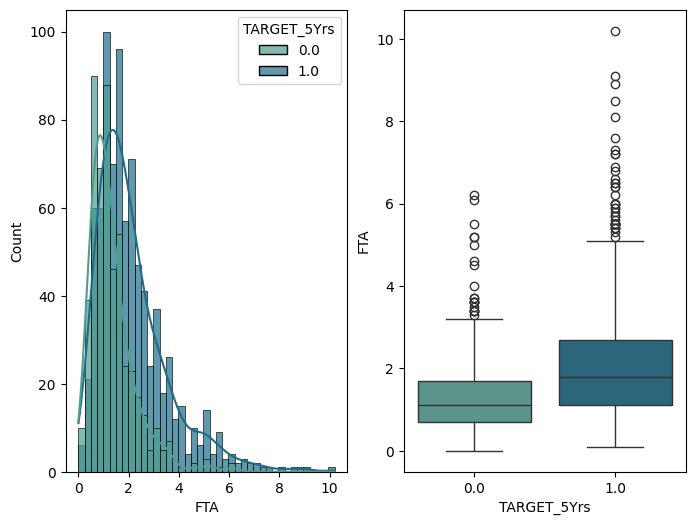

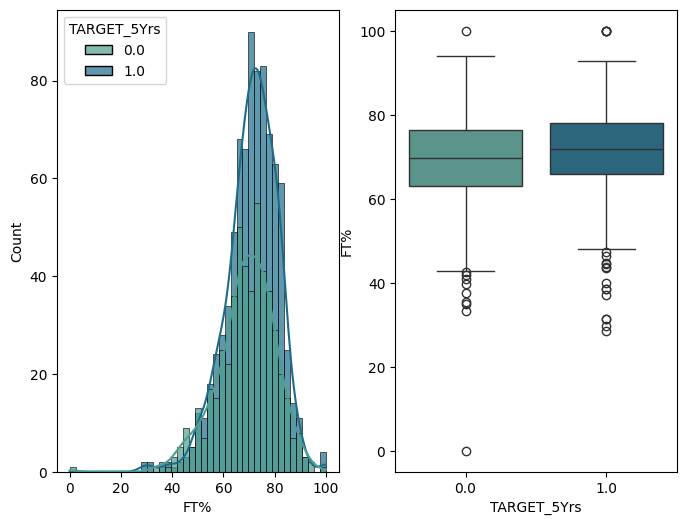

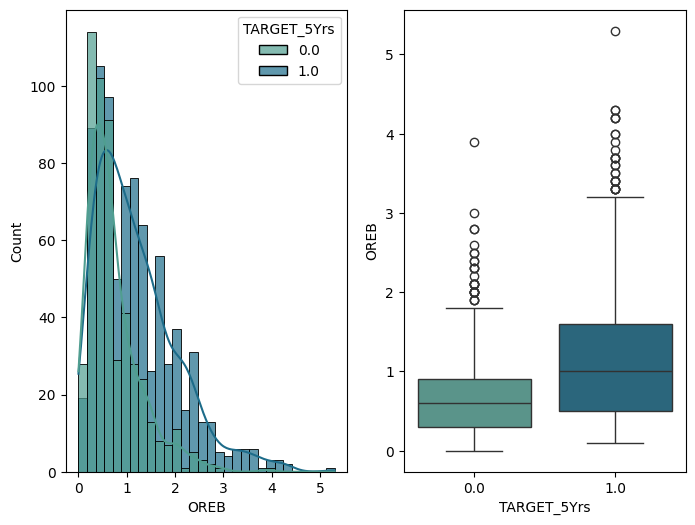

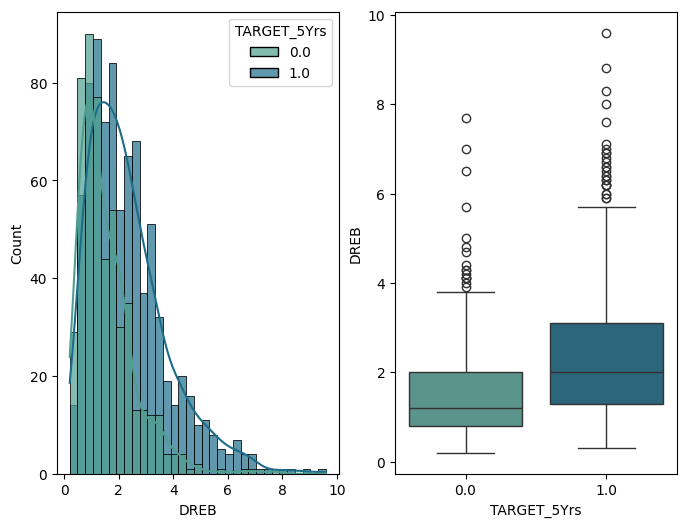

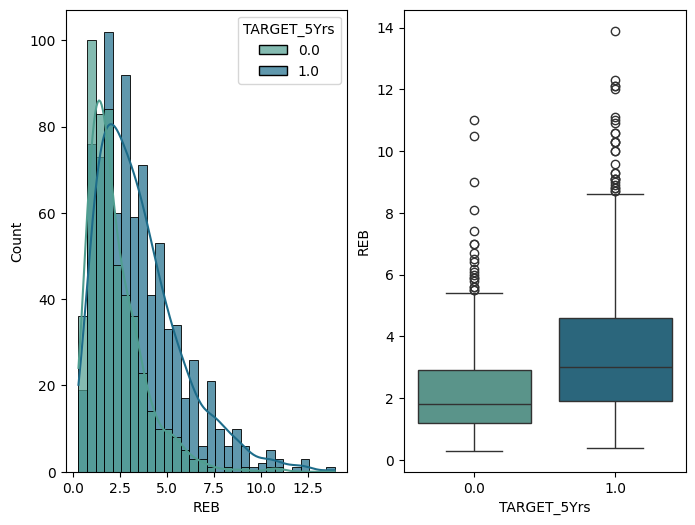

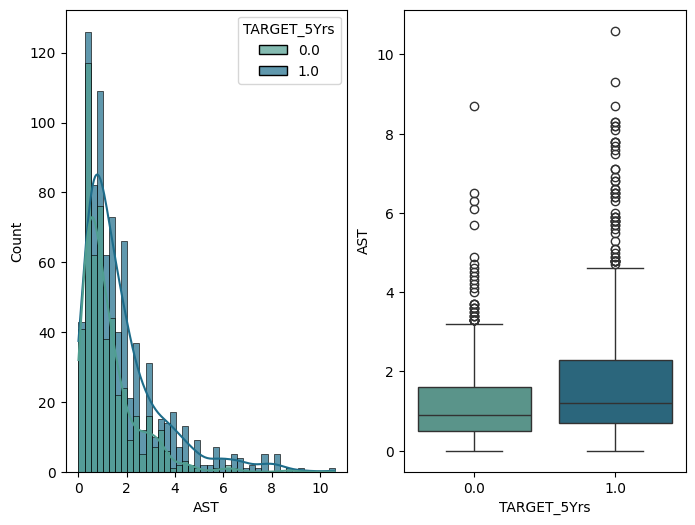

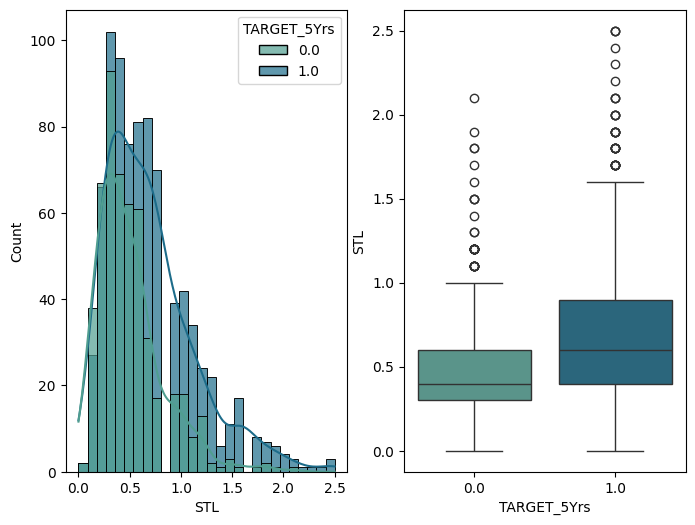

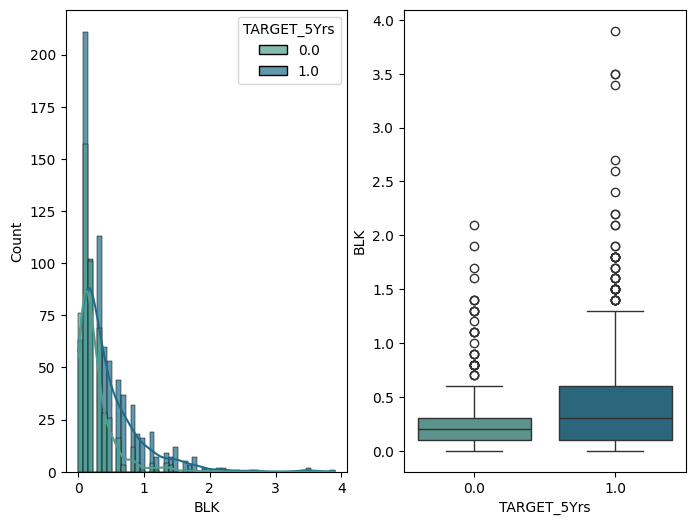

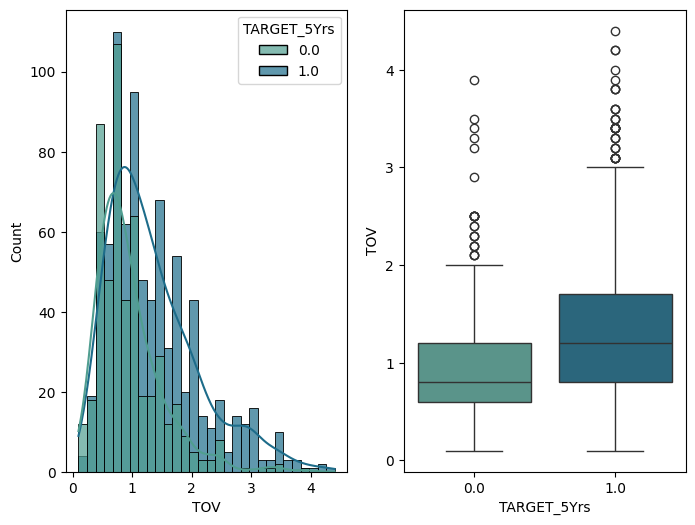

In [16]:
for col in df.select_dtypes('float'):
        if col != 'TARGET_5Yrs':
         plt.figure(figsize=(8, 6))
         plt.subplot(1,2,1)
         sns.histplot(data=df, x=col, hue='TARGET_5Yrs', kde=True, palette="crest", alpha=0.7, common_norm=False)
         plt.subplot(1,2,2)
         sns.boxplot(x='TARGET_5Yrs', y=col, data=df,hue='TARGET_5Yrs',palette="crest")
         plt.legend([],[], frameon=False)
         plt.show()

# Test hypothesis with non-parametric tests

In [17]:
# Wilcoxon
from scipy.stats import mannwhitneyu

In [18]:
# GP
no_invest = df[df['TARGET_5Yrs'] == 0]['GP']  
invest = df[df['TARGET_5Yrs'] == 1]['GP']

st,p = mannwhitneyu(no_invest,invest)

print(f" GP (diff based on Target_5 year), p =  {p}")


 GP (diff based on Target_5 year), p =  8.551378141471931e-48


In [19]:
col_list = ("MIN","PTS","FGM","FGA","FG%","FTM","3P Made","FT%" ,"AST","STL","TOV")

for col in col_list:
 
    no_invest = df[df['TARGET_5Yrs'] == 0][col]  
    invest = df[df['TARGET_5Yrs'] == 1][col]

    st,p = mannwhitneyu(no_invest,invest)
    print(f"In col {col :<8} : significant diff between invest and no_invest, p =  {p :2f}")

In col MIN      : significant diff between invest and no_invest, p =  0.000000
In col PTS      : significant diff between invest and no_invest, p =  0.000000
In col FGM      : significant diff between invest and no_invest, p =  0.000000
In col FGA      : significant diff between invest and no_invest, p =  0.000000
In col FG%      : significant diff between invest and no_invest, p =  0.000000
In col FTM      : significant diff between invest and no_invest, p =  0.000000
In col 3P Made  : significant diff between invest and no_invest, p =  0.243306
In col FT%      : significant diff between invest and no_invest, p =  0.000186
In col AST      : significant diff between invest and no_invest, p =  0.000000
In col STL      : significant diff between invest and no_invest, p =  0.000000
In col TOV      : significant diff between invest and no_invest, p =  0.000000


# Pre-processing

In [20]:
# Reload df
df = df1.copy()

In [21]:
# Remove duplicates within players column
print(df1.shape)
df = df.drop_duplicates(subset='Name')
print(df.shape)


(1340, 21)
(1294, 21)


In [22]:
# Filters dF based upon stats
clean_df = df[["GP","MIN","PTS","FGM","FGA","FG%","FTM","FT%" ,"AST","STL","TOV","TARGET_5Yrs"]].reset_index(drop=True)
print(clean_df.head())

   GP   MIN  PTS  FGM  FGA   FG%  FTM   FT%  AST  STL  TOV  TARGET_5Yrs
0  36  27.4  7.4  2.6  7.6  34.7  1.6  69.9  1.9  0.4  1.3          0.0
1  35  26.9  7.2  2.0  6.7  29.6  2.6  76.5  3.7  1.1  1.6          0.0
2  74  15.3  5.2  2.0  4.7  42.2  0.9  67.0  1.0  0.5  1.0          0.0
3  58  11.6  5.7  2.3  5.5  42.6  0.9  68.9  0.8  0.6  1.0          1.0
4  48  11.5  4.5  1.6  3.0  52.4  1.3  67.4  0.3  0.3  0.8          1.0


# Modelling

In [23]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report,recall_score
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline,Pipeline

In [24]:
labels  = clean_df.drop('TARGET_5Yrs', axis=1).columns 
X       = clean_df.drop('TARGET_5Yrs', axis=1).values
y       = clean_df['TARGET_5Yrs'].values


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Try with a first basic model

In [26]:
model = DecisionTreeClassifier(random_state=42)

In [27]:
def evalution(model,X_train, y_train, X_test, y_test):

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    N,train_score, val_score = learning_curve(model, X_train,y_train,
                                              cv = StratifiedKFold(n_splits=3), scoring = "recall",
                                              train_sizes=np.linspace(0.1,1,10))
    

    plt.figure(figsize=(6,4))
    plt.plot(N,train_score.mean(axis=1),label = 'train score')
    plt.plot(N,val_score.mean(axis=1),label = 'val score')
    
    plt.ylim(0, 1.2)
    plt.legend()
    plt.grid(False)
    plt.show()

[[ 52  53]
 [ 52 102]]
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50       105
         1.0       0.66      0.66      0.66       154

    accuracy                           0.59       259
   macro avg       0.58      0.58      0.58       259
weighted avg       0.59      0.59      0.59       259



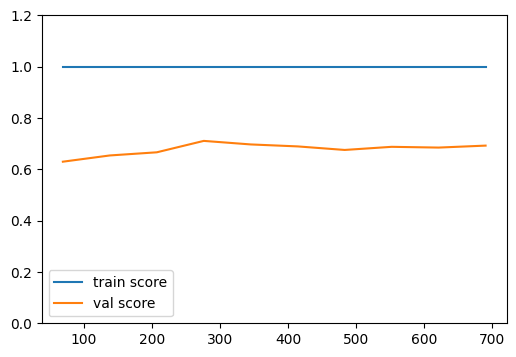

In [28]:
evalution(model,X_train, y_train, X_test, y_test)

### Improve recall score by chossing another model

In [29]:
dict_of_models  = {"SVM" : make_pipeline(StandardScaler(),SVC(random_state=42)),
                   "KNN" : make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=3))}

Model : SVM
[[ 54  51]
 [ 25 129]]
              precision    recall  f1-score   support

         0.0       0.68      0.51      0.59       105
         1.0       0.72      0.84      0.77       154

    accuracy                           0.71       259
   macro avg       0.70      0.68      0.68       259
weighted avg       0.70      0.71      0.70       259



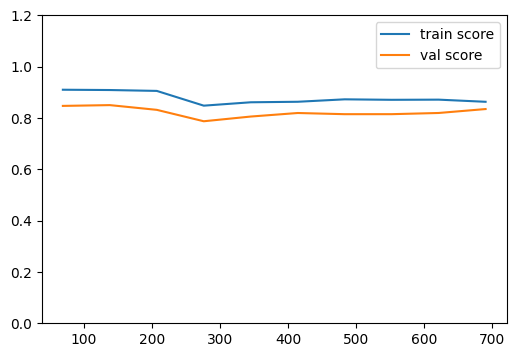

Model : KNN
[[ 57  48]
 [ 40 114]]
              precision    recall  f1-score   support

         0.0       0.59      0.54      0.56       105
         1.0       0.70      0.74      0.72       154

    accuracy                           0.66       259
   macro avg       0.65      0.64      0.64       259
weighted avg       0.66      0.66      0.66       259



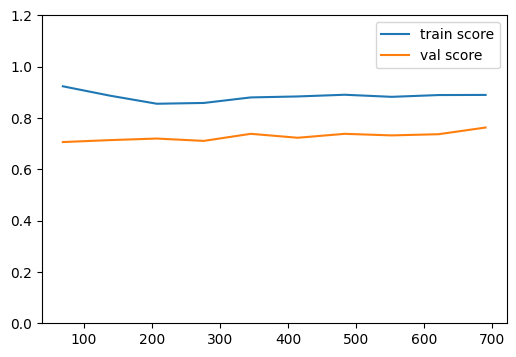

In [30]:
for model_name, model in dict_of_models.items():
   print(f"Model : {model_name}")
   evalution(model,X_train, y_train, X_test, y_test)


### Model optimization

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
model_to_optimize = make_pipeline(StandardScaler(),SVC(random_state=42))

In [33]:
def grid_model(model,X_train, y_train, X_test, y_test):

    hyper_parameters = {'svc__gamma':[1e-3,1e-4],
                    'svc__C' : [0.1,1,10,100,1000] , 
                    'svc__kernel': ['linear']} 

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    grid = GridSearchCV(model, hyper_parameters,cv=cv)
    grid.fit(X_train,y_train)
    y_pred = grid.predict(X_test)
    print("Best Hyperparameters:", grid.best_params_)
    print(classification_report(y_test,y_pred))

    N, train_score, val_score = learning_curve(grid.best_estimator_, 
    X_train, y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='recall',
    train_sizes=np.linspace(0.1, 1, 10))
    

    plt.figure(figsize=(6,4))
    plt.plot(N,train_score.mean(axis=1),label = 'train score')
    plt.plot(N,val_score.mean(axis=1),label = 'val score')
    plt.ylim(0.5, 1)
    plt.legend(ncols=2, loc= 'lower center')
    plt.grid(False)
    plt.show()

Best Hyperparameters: {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.66      0.52      0.59       105
         1.0       0.72      0.82      0.76       154

    accuracy                           0.70       259
   macro avg       0.69      0.67      0.67       259
weighted avg       0.69      0.70      0.69       259



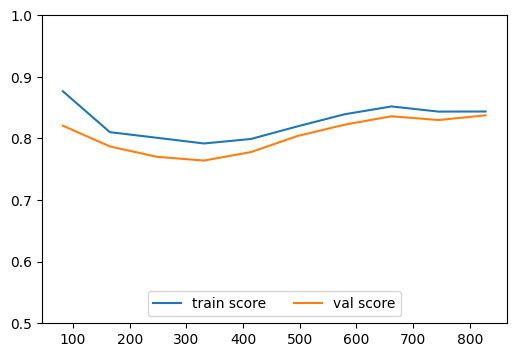

In [34]:
grid_model(model_to_optimize,X_train, y_train, X_test, y_test)

### Do we need all features ?


In [35]:
from sklearn.feature_selection import SelectKBest, f_classif 

In [36]:
final_model = make_pipeline(StandardScaler(),SelectKBest(score_func=f_classif),SVC(random_state=42))
def grid_model_features_selection(model,X_train, y_train, X_test, y_test):


    hyper_parameters = {
        'selectkbest__k': range(1, X_train.shape[1] + 1), 
        'svc__gamma': [1e-4, 1e-3],
        'svc__C' : [0.1,1,10,100,1000] , 
        'svc__kernel': ['linear']} 

    grid = GridSearchCV(
        final_model, 
        hyper_parameters,
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        scoring='recall',n_jobs = -1)

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    # Get the number of features and their names
    select_k_best = grid.best_estimator_.named_steps['selectkbest']
    selected_mask = select_k_best.get_support()
    selected_feature_names = labels[selected_mask].to_list()
    y_pred = best_model.predict(X_test)
   
    print(f"Features selected  : {selected_feature_names}")
    print("Best Hyperparameters:", grid.best_params_)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred, zero_division=1))

    N, train_score, val_score = learning_curve(
        best_model, 
        X_train, y_train,
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        scoring='recall',
        train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(6,4))
    plt.plot(N,train_score.mean(axis=1),marker = 'o',label = 'train score')
    plt.plot(N,val_score.mean(axis=1),label = 'val score')
    plt.ylim(0, 1.1)
    plt.legend(ncols=2, loc= 'lower center')
    plt.grid(False)
    plt.savefig('final.png')
    plt.show()


    return best_model

Features selected  : ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', 'FTM', 'STL', 'TOV']
Best Hyperparameters: {'selectkbest__k': 9, 'svc__C': 100, 'svc__gamma': 0.0001, 'svc__kernel': 'linear'}
[[ 51  54]
 [ 26 128]]
              precision    recall  f1-score   support

         0.0       0.66      0.49      0.56       105
         1.0       0.70      0.83      0.76       154

    accuracy                           0.69       259
   macro avg       0.68      0.66      0.66       259
weighted avg       0.69      0.69      0.68       259



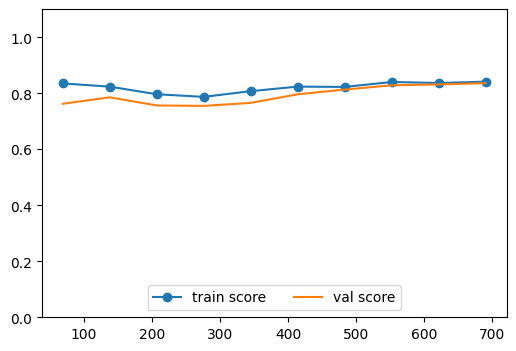

In [37]:
best_model = grid_model_features_selection(model,X_train, y_train, X_test, y_test)

# Save final model

In [38]:
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

# Test the model on randomly new data

In [53]:
col = ('GP','MIN','PTS','FGM','FGA','FG%','FTM','FT%','AST','STL','TOV')
dt  =  np.array([52 ,105.4 , 7.4 , 2.6,  7.6 , 34.7 , 1.6 ,0,0,  0.4 , 1.3])
dt  = dt.reshape(1,dt.shape[0])
y_new_pred  = best_model.predict(dt)
y_new_pred  = y_new_pred > 0.5
print(f"Invest? {y_new_pred}")

Invest? [False]


Conclusion : 

I should try another model or another feature selection method to better reduce the number of input !

# Web app on Flask (run locally)

For displaying purposes, the flask python code will be shown here! 

it's better to have the Flask script into a separated app.py file

In [ ]:
from flask import Flask,render_template,request

# Flask app
app = Flask(__name__)

# Load best_model
loaded_model = joblib.load('best_model.pkl')


@app.route("/", methods=["GET", "POST"])
def index():
    
    if request.method == "POST":
        try:
                GP = float(request.form.get('GP'))
                MIN = float(request.form.get('MIN'))
                PTS = float(request.form.get('PTS'))
                FGM = float(request.form.get('FGM'))
                FGA = float(request.form.get('FGA'))
                FG = float(request.form.get('FG%'))  
                FTM = float(request.form.get('FTM'))
                STL = float(request.form.get('STL'))
                TOV = float(request.form.get('TOV'))

                
                # Add default values for running the model
                TPTM = 0.0 #Default Value
                TPTA = 0.0 #Default Value

                input_data = pd.DataFrame({
                'GP': [GP],
                'MIN': [MIN],
                'PTS': [PTS],
                'FGM': [FGM],
                'FGA': [FGA],
                'FG%': [FG], 
                'FTM': [FTM],
                'STL': [STL],
                'TOV': [TOV],
                '3PTM': [TPTM],  
                '3PTA': [TPTA] })
                
                # Prediction with the best_model
                prediction = loaded_model.predict(input_data)[0]
                

        except ValueError:
            error_message = "Invalid input. Please enter numbers only."
          
       
        return render_template("index.html", output_message=prediction)


if __name__ == '__main__':
        app.run(debug=True,host= "127.0.0.1", port = 5000)

### HTML code used alongside with the Web app code

Should be also into a separate index.html file

In [106]:
from IPython.display import HTML

In [117]:
html_code = """
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <title>NBA</title>
        
        <!-- add icon link -->
        <link rel="icon" href=
        "https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Isolated_basketball.png/600px-Isolated_basketball.png?20121214161940"
        type="image/x-icon" 
        />
        
        <!--- internal CSS style for this short example --->


        <style>
        
        .tbox {
          margin: 10px;
          padding:10px; 
                }
        
               
        .box {
        
          background-color: #2da1ff ;  
          color: white;
          margin: 10px;
          padding: 20px; 
          width: 250px;
  		    height: 350px;
              
        }
             
        </style>
    
    </head>

<!--- Body --->
<body>

    <div class="tbox">
      <h2> Investment</h2>
      <p> Enter NBA's single player stats</p>
    </div>

    <!--- Make it a bit sexier  --->
    <!--- FORM  SECTION --->
    <div class="box">
    <table> 
       <form  action="http://127.0.0.1:5000" method="POST" target="_self">
       <tr> <td> <label for="name"> GP </label> </td> 
           <td><input type="text" name="GP" value=" "/></td> 
       </tr> 
       <tr> <td> <label for="name"> MIN </label> </td> 
        <td><input type="text" name="MIN" value=" "/></td> 
        </tr> 
        <tr> <td> <label for="name"> PTS </label> </td> 
          <td><input type="text" name="PTS" value=" "/></td> 
        </tr>
        <tr> <td> <label for="name"> FGM </label> </td> 
          <td><input type="text" name="FGM" value=" "/></td> 
        </tr>
        <tr> <td> <label for="name"> FGA </label> </td> 
          <td><input type="text" name="FGA" value=" "/></td> 
        </tr>  
        <tr> <td> <label for="name"> FG% </label> </td> 
          <td><input type="text" name="FG%" value=" "/></td> 
        </tr>  
        <tr> <td> <label for="name"> FGM </label> </td> 
          <td><input type="text" name="FGM" value=" "/></td> 
        </tr>
        <tr> <td> <label for="name"> FTM </label> </td> 
          <td><input type="text" name="FTM" value=" "/></td> 
        </tr> 
        <tr> <td> <label for="name"> STL </label> </td> 
          <td><input type="text" name="STL" value=" "/></td> 
        </tr>
         <tr> <td> <label for="name"> TOV </label> </td> 
          <td><input type="text" name="TOV" value=" "/></td> 
        </tr>       
       </form> 
       
       </table> 
      </div class="box">

    <!--- OUTPUT SECTION --->
    <div class="tbox">
      <label for="fname">Invest ?</label><br>
      <p>{{ prediction }}</p>
    </div class="box">

  </body>
</html>

"""
HTML(html_code)

GP,
MIN,
PTS,
FGM,
FGA,
FG%,
FGM,
FTM,
STL,
TOV,
